<a href="https://colab.research.google.com/github/ZakiUllahUsmani/airbnb-bookings-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Zaki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis

##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual
##### **Name -** MD ZAKI ULLAH USMANI

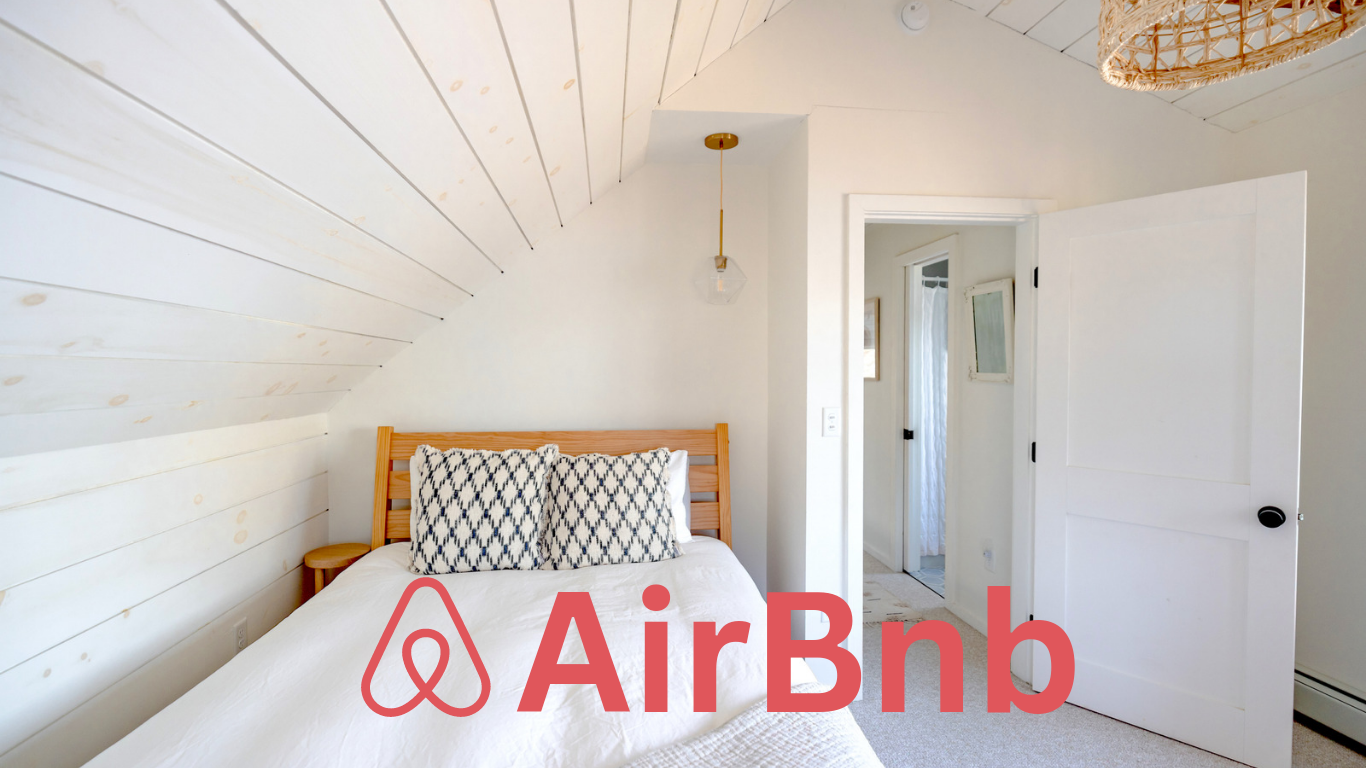

#**Project Summary**

### Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.
### The company had come a long way since 2007 when its co-founders first came up with the idea to invite paying guests to sleep on an air mattress in their living room. According to Airbnb's latest data, it has more than six million listings, covering more than 100,000 cities and towns and 220-plus countries worldwide.
### Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb has become a one-of-a-kind service that is used and recognized by the world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services, and much more.
### This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.
### Travel industries are having an important reflection of the economy over the past few decades, and Airbnb housing price ranges are of great interest to both Hosts and Travelers. In this project, we are analyzing the various aspects with different use cases which covers many aspects of Airbnb listings. It helps in not only understanding the meaningful relationships between attributes but also allows us to do our own research and come up with our findings.

# **Problem Statement**

#### **What can we learn about different hosts and areas?**
#### **What can we learn from predictions? (ex: locations, prices, reviews, etc)**
#### **Which hosts are the busiest and why?**
#### **Which room type is preferred in most popular neighbourhood? </b>**
#### **Top neighbourhoods in NYC with respect to average price/day of Airbnb        listings?**

## **Business objective**

###The objective of the project is to perform an exploratory data analysis, data pre-processing, data cleaning & imputation and at the end, apply different Data Visualization techniques to get the meaningful insight from the given data. This project aims apply some amazing Python Libraries such as Numpy, Pandas, Matplotlib and seaborn, which will give better insights and beautiful visualization.

In [115]:
# first i'm going to import some libraries, through which i can manupulate and visualize the data to get the valuable insights.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [116]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# here i'm uploading the data to process it through pandas.
file_path='/content/drive/MyDrive/Capstone Project 1/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [118]:
# now it's time to summarise the data.
# let's see the columns first, so that i'll have the idea which column is to deal with.
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

## Features understanding.
 * **id:-** listing ID
 * **name:-** name of the listing
 * **host_id:-** host ID
 * **host_name:-** name of the host
 * **neighbourhood_group:-** location
 * **neighbourhood:-** area
 * **latitude:-** latitude coordinates
 * **longitude:-** longitude coordinates
 * **room_type:-** listing space type
 * **price:-** price in dollars
 * **minimum_nights:-** amount of nights minimum
 * **number_of_reviews:-** number of reviews
 * **last_review:-** latest review
 * **reviews_per_month:-** number of reviews per month
 * **calculated_host_listings_count:-** amount of listing per host
 * **availability_365:-** number of days when listing is available for booking

In [119]:
# checking the shape of the data.
df.shape

(48895, 16)

In [120]:
# checking the categorical columns.
cat_col = df.select_dtypes(include='object').columns
print(list(cat_col))

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [121]:
#  now let's check the numerical columns.
num_col = df.select_dtypes(exclude='object').columns
list(num_col)

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [122]:
# let's see the first and the last five data by the help of head and tail method.

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [123]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [124]:
#  let's see the overall discriptions of all the numerical variables.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [125]:
# i've seen the data from different aspects. now i need to clean the data by dealing with missing or null values and droping some useless columns.
# let's check the info first.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Cleaning the data.

In [126]:
#  droping the useless column.
data = df.drop(['id','last_review'], axis=1)

In [127]:
data.shape

(48895, 14)

In [128]:
# let's check for the null values.
data.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

###It is clearly shown above, that we have some null values in name, host_name and reviews_per_month column. Let's deal with it through fillna().

In [129]:
# replacing null values of name as not present, host_name as absent and the null value of reviews_per_month with 0.
data.fillna({'name': 'not present','host_name':'absent','reviews_per_month':0},inplace = True)


In [130]:
#  let's check the null values again.
data.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### As i can see above that i'm done with the null values.

In [131]:
#  huh! i'm done with the cleaning part. let's see the short summary of the data again with .describe method to check is there any redundancy left.
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###Yes, everything looks fine. But wait, I can see two wrong values in price and availability_365. Which is 0, so it'll affect the business. The reason for this could be the host has set the wrong price or maybe the host has discontinued his listing. Let's find out.

In [132]:
#  first i'm checkig that if the price and availability_365 is zero, then it's clear to us that the host has discontinued his listings.
#  so i'll inform those listings to our team, so that it won't give a bad experience to the customers.
discontinued_listings=data[(data['price']==0) & (data['availability_365']==0)]
discontinued_listings

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
26259,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0


Only three discontinued listings have found.

In [133]:
# now i'll check the host with zero price but their availability is not zero. that means sumhow they have filled the zero price by mistake.
# i can find out that listings and tell the host to rectify the price.
listings_with_0_price = data[(data['price']==0) & (data['availability_365']!=0)]
print(listings_with_0_price.shape)
(listings_with_0_price)

(8, 14)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25778,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26841,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
26866,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139


###There is only eight host with zero price.

In [134]:
# let's exclude property with listed price of 0
data = data.loc[data['price'] > 0]

In [135]:
#  examining the dataset again.
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

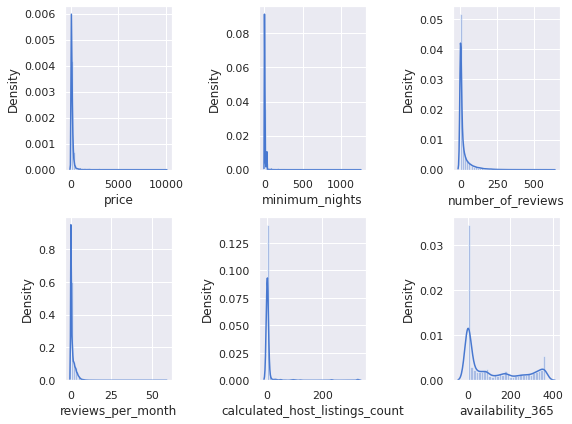

In [136]:
# data is cleaned completely. now let's find out some useful insights.
# checking the distribution first.
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(data['price'])

subplot(2,3,2)
sns.distplot(data['minimum_nights'])

subplot(2,3,3)
sns.distplot(data['number_of_reviews'])

subplot(2,3,4)
sns.distplot(data['reviews_per_month'])

subplot(2,3,5)
sns.distplot(data['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(data['availability_365'])

plt.tight_layout()

### I am visualizing the distribution through Distplot to see the distributions of every useful numerical columns. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.


###As we can see here that most features are right skewed. In price column there are some properties that charging approximately $10,000 for just one night. That could be the most expensive listing.

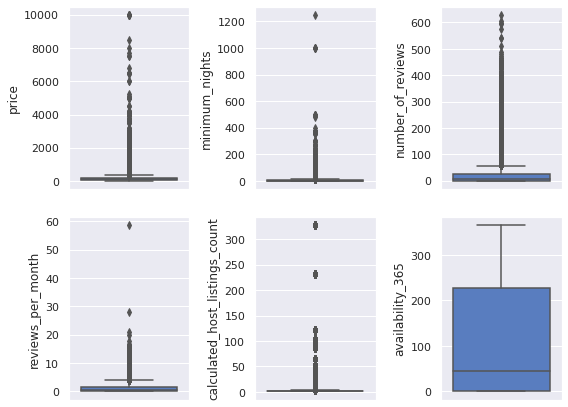

In [137]:
# checking the distribution through box plot.
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = data['price']) 

subplot(2,3,2)
sns.boxplot(y = data['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = data['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = data['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = data['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = data['availability_365'])

plt.tight_layout()
plt.draw()

### I wanted to see the distribution again through the box plot also, just to get a broader experience of different features distribution.

###As we can see that there is some extreme values or outliers present in this data. Outliers sometime creates a mess in machine learning model. But here i'm only doing the exploratory data analysis, so as of know i don't have to worry about this.



#   **What can we learn about different hosts and areas?**



# Area with number of listings.

In [138]:
# checking the unique neighbourhood group.
list(data['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [139]:
# checking the neighbourhood_group with nummber of listings.
data.neighbourhood_group.value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


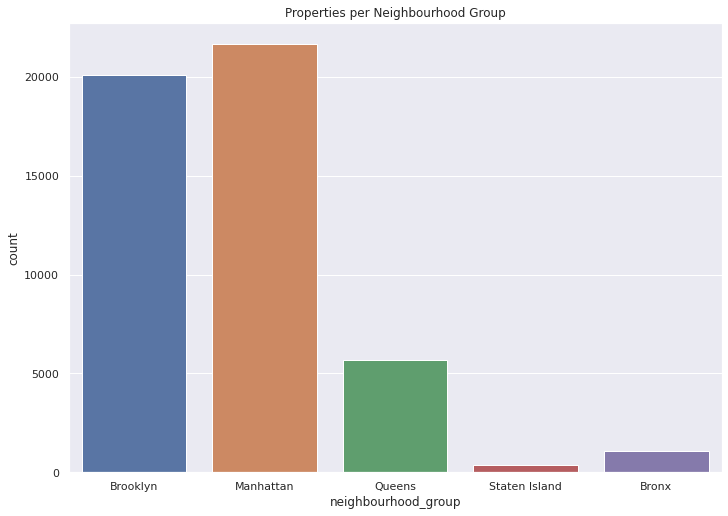

In [140]:
# finding the area with maximum and minimum number of listings.
sns.set(rc={'figure.figsize':(11.7,8.27)})
title = 'Properties per Neighbourhood Group'
sns.countplot(data['neighbourhood_group'])
plt.title(title)
plt.ioff()

### Visualizing through Bar Graph because this is a single-column visualization.
###There are five neighborhood groups in this data. Brooklyn, Manhattan, Queens, Staten Island, and the Bronx. Manhatten has 21660 listings which is the highest number of listings. The state island has the lowest number of listings (373). while Brooklyn-20095, Queens-5666, and Bronx have 1090 listings.

###We can approach the neighbourhood group which has less number of listings. If somehow we can manage the price of some listings, we'll be able to reduce the average price of that neighbourhood group that has a sufficient amount of attraction, then we can have more customers in that location. more customers mean more money and more money will lead an increase of listings in that neighbourhood.

# Number of listings with different room type.

In [141]:
# checking the unique room type.
list(data['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [142]:
# finding the number of listings with different room type and counting the values of each room type in the whole NYC data.
data['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

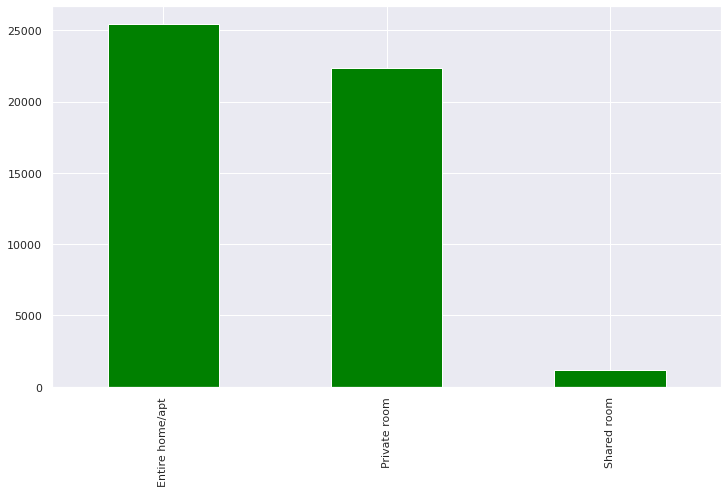

In [143]:
# let's visualize the data.
data['room_type'].value_counts().plot(kind='bar',color='green',figsize=(12,7))


###I am using Bar Ploat to see the number of listings with different room types because we are visualizing only one feature. 
###As we can see that there are three room types in this data. Private room, entire home/apartment, and shared rooms. Of which 25407 listings are entire homes or apartments, 22319 are private rooms, and 1158 are shared rooms. 
###Most properties are entire rooms or apartments. There are only a few properties with shared rooms. Because most peoples prefer the private room type or the entire home.

# Number of listings solely made for rental purpose.

In [144]:
# now i'm gonna see that if the availability of the property is 365 and the room type is entire apartment or home by putting the conditions.
renting_purpose = data[(data['availability_365']==365) & (data['room_type']=='Entire home/apt')]
print(renting_purpose.shape)
renting_purpose.head()


(485, 14)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
164,Charming & Cozy midtown loft any WEEK ENDS !!!,174025,Sylvia,Manhattan,Upper East Side,40.76123,-73.96420,Entire home/apt,250,3,4,0.08,1,365
181,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,0.11,5,365
201,3 floors of luxury!,204539,Mark,Queens,Middle Village,40.71546,-73.87854,Entire home/apt,265,7,38,0.38,5,365
229,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,0.01,5,365
235,SpaHa Studio Monthly Rental,292204,Blanca,Manhattan,East Harlem,40.79163,-73.94573,Entire home/apt,125,28,183,1.83,2,365


In [145]:
# Let's check how many listings each neighborhood group have this sort of property listed.
renting_purpose['neighbourhood_group'].value_counts()

Manhattan        316
Brooklyn         117
Queens            41
Bronx              9
Staten Island      2
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


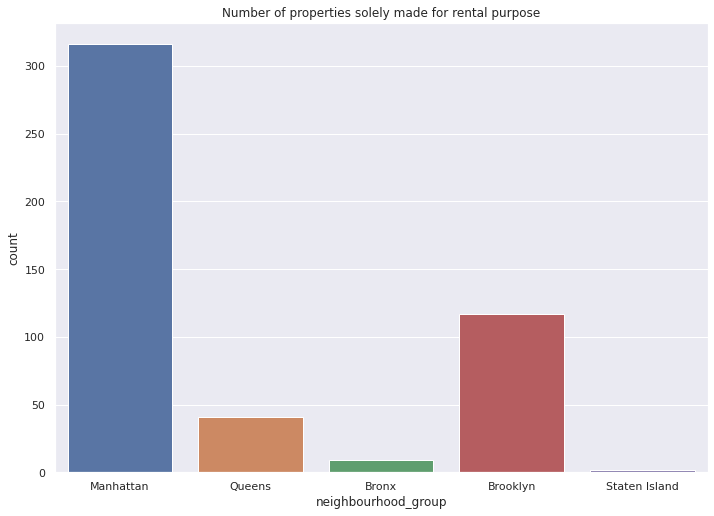

In [146]:
# Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
title = 'Number of properties solely made for rental purpose'
sns.countplot(renting_purpose['neighbourhood_group'])
plt.title(title)
plt.ioff()

###I am again using a bar graph through seaborn to visualize it because I'm visualizing a single variable.

###Through this visualization, we can say that Manhatten has the maximum number of properties (316) solely made for rental purposes. Brooklyn (117) has the second most number of that sort of listings followed by Queens (41) and Bronx (9). State Island has only two liatings.

###As we know that Manhatten is the most expensive but attractive neighborhood group, which is why they have a huge tourist attraction. So they are making more properties only for renting to get more money. We can also approach Brooklyn to increase this kind of listing because an entire home or apartment is the most preferred room type in the entire NYC.


# Top five listings.

In [147]:
#  finding top five listings on the basis of number of listings.
listings_count_df=data['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,not present,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


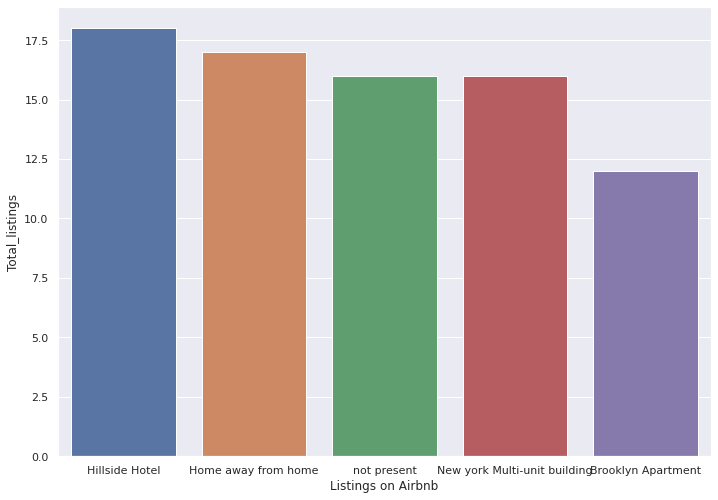

In [148]:
# Visualization
sns.barplot(x='Listings on Airbnb', y=('Total_listings'), data=listings_count_df)
plt.show()

###These are the top five properties that have the highest number of listing counts. in which Hillside hotel has 18, Home away from home-17, New york multi-unit building-16, Brooklyn apartment 12 and the listings which have its name absent has 16 numbers of listings listed on Airbnb.

# Top ten host.

In [149]:
# now let's find out the top 10 hosts on the basis of number of listings in NYC.
top_10_hosts=data['host_name'].value_counts()[:10]
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 10 hosts')

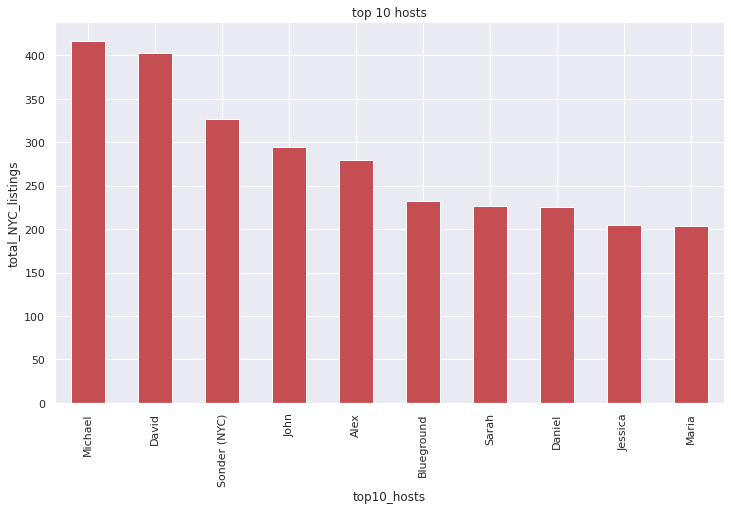

In [150]:
# let's see it better.
top_10_hosts.plot(kind='bar',color='r', figsize=(12,7))

plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts')

###I have found the top ten hosts with the maximum number of listing counts. In we have seen that Michael has the maximum number of properties listed in Nyc followed by David. Apart from this Jessica and Maria has the lowest number of properties listed in Nyc according to the above observation.

# Top ten neighbourhood

In [151]:
# top ten neighbourhood on the basis of number of listings.
# let's see the unique neighbourhood present in entire NYC first.
print(data['neighbourhood'].nunique())
list(data['neighbourhood'].unique())

221


['Kensington',
 'Midtown',
 'Harlem',
 'Clinton Hill',
 'East Harlem',
 'Murray Hill',
 'Bedford-Stuyvesant',
 "Hell's Kitchen",
 'Upper West Side',
 'Chinatown',
 'South Slope',
 'West Village',
 'Williamsburg',
 'Fort Greene',
 'Chelsea',
 'Crown Heights',
 'Park Slope',
 'Windsor Terrace',
 'Inwood',
 'East Village',
 'Greenpoint',
 'Bushwick',
 'Flatbush',
 'Lower East Side',
 'Prospect-Lefferts Gardens',
 'Long Island City',
 'Kips Bay',
 'SoHo',
 'Upper East Side',
 'Prospect Heights',
 'Washington Heights',
 'Woodside',
 'Brooklyn Heights',
 'Carroll Gardens',
 'Gowanus',
 'Flatlands',
 'Cobble Hill',
 'Flushing',
 'Boerum Hill',
 'Sunnyside',
 'DUMBO',
 'St. George',
 'Highbridge',
 'Financial District',
 'Ridgewood',
 'Morningside Heights',
 'Jamaica',
 'Middle Village',
 'NoHo',
 'Ditmars Steinway',
 'Flatiron District',
 'Roosevelt Island',
 'Greenwich Village',
 'Little Italy',
 'East Flatbush',
 'Tompkinsville',
 'Astoria',
 'Clason Point',
 'Eastchester',
 'Kingsbridge',


In [152]:
# Lets find the name of top 10 neighbourhoods with most listings
df1 = data.groupby(['neighbourhood'])['host_id'].count().nlargest(10)
df1

neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: host_id, dtype: int64

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

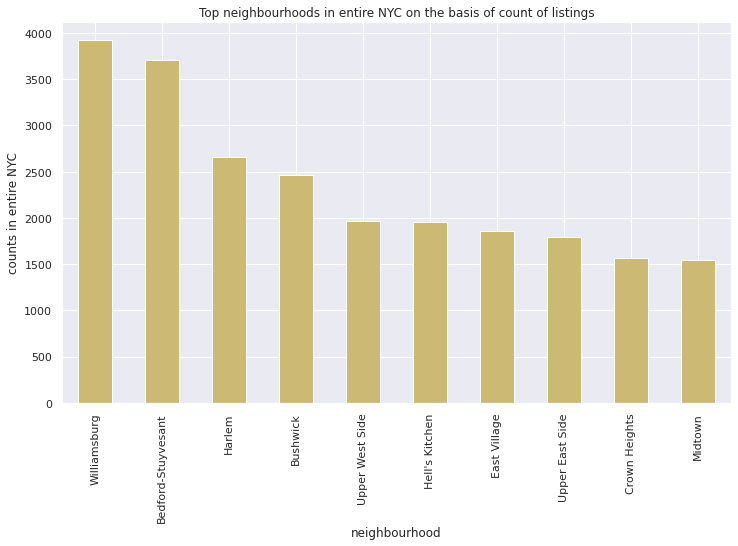

In [153]:
# i'm going to visualize the top ten neighbourhood on the basis of number of listings.
top_10_neigbours= data['neighbourhood'].value_counts()[:10]
top_10_neigbours.plot(kind='bar',color='y',figsize=(12,7))
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

### Bar plot is very useful to visualize a single feature, here I want to see the top ten neighbourhoods based on the number of listings. So I am experiencing that through Bar Graph.
###In this observation we have seen that Williamsburg (3919) has the highest number of listings which is a borough of Brooklyn, while Crown Heights (Brooklyn) has 1564 and Midtown (Manhatten) have the lowest which is 1545.

###We can follow the same strategy as mentioned above to increase the number of guests by managing the price of the neighbourhood with less number of listings who has a sufficient amount of attractions.

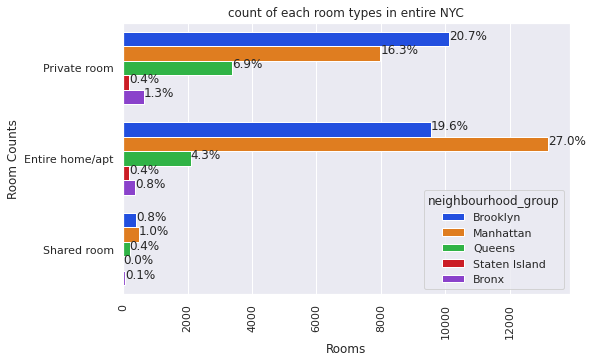

In [154]:
# here i'm finding the count of each room type in the entire NYC.
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=data,palette='bright')

total = len(data['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

###Through this graph, we can easily compare the number of room types in the entire neighbourhood group. As we can see Brooklyn has the highest number of private room type listings with 20.7% listings of all the listings. Then Manhatten has 16.3% followed by Queens with 6.9%. While State Island has only 0.4% and the Bronx has 1.3% private room type listings.
###If I talk about the Entire home or apartment room type then Manhatten has the highest number of listings with 27.0% of the total number of listings. Brooklyn stays in second position with 19.6% followed by Queens with 4.3%. While State Island has 0.4 and the Bronx has 0.8% percent of total listings.
### Shared room type has a very less percentage as compared to all. Manhatten has the highest with 1.0%, Brooklyn has 0.8%, Queens has 0.4% followed by the Bronx with 0.1%. while State Island has 0.0% shared room listings.

*   Through all these observations we can say that the entire home/apartment room type is the highest number of listings in the entire NYC. Wherein Manhatten has the highest and State Island has the lowest number of listings.


*   Majority of the entire home room type listings are in Manhattan and Brooklyn which makes 46.6% of the total number of listings. Wherein Queens, State Island, and Bronx altogether have only 5.5% entire home/apartment room type of the total number of listings.


*   In private room type listings, Brooklyn has the highest number of listing followed by Manhatten. They both have 37% of all the listings. while Queens State Island and Bronx altogether have only 8.6%  private room type total listings.


*   Shared room type has the lowest number of listing with a total 2.3% only.





# **What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [155]:
# Finding which neighbourhood has got maximum number of reviews. 
areas_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


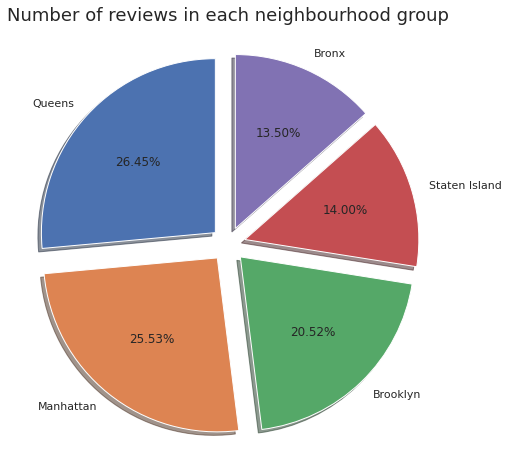

In [156]:
# Visualising the number of reviews in each neighbourhood group through pie chart.
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

###I'm usin pie chart for visualisation here because a Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. 



###The share percentage of reviews for each neighbourhood group is depicted above. It can be stated that Queens, Manhattan have majority of reviews which implies that people are liking these neighbourhoods. Also from these neighbourhoods majority revenue is generated for the company.

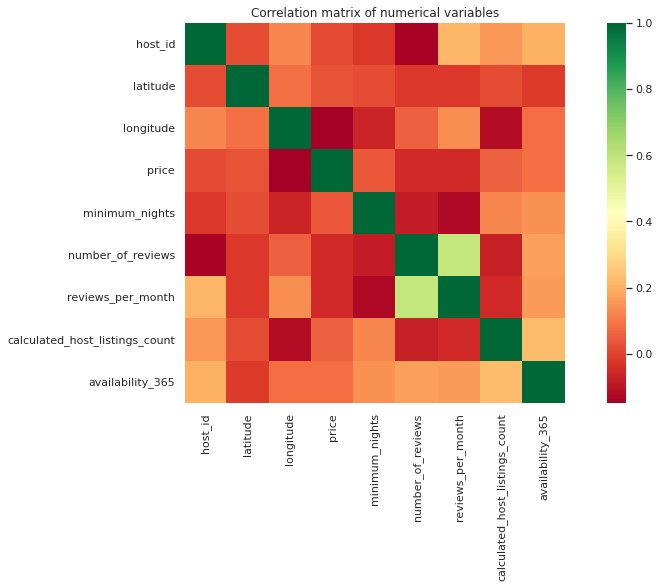

In [157]:
# checking the correlation within every numerical columns.
plt.figure(figsize=(15,7))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

###Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. As we can see the meter of this heatmap on the right side shows the correlation status with some colors. like green is highly correlated, brown is less correlated, and red color means negatively correlated.




###We can see a lot of correlations within multiple features. like reviews per month are highly correlated with the number of reviews while the availability_365 and calculated_host_listings_count have some correlation. on the other side, there is no correlation between latitude and availability_365. through this heatmap, we can get a lot of insights.

# Location with latitude and longitude on scatter plot.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


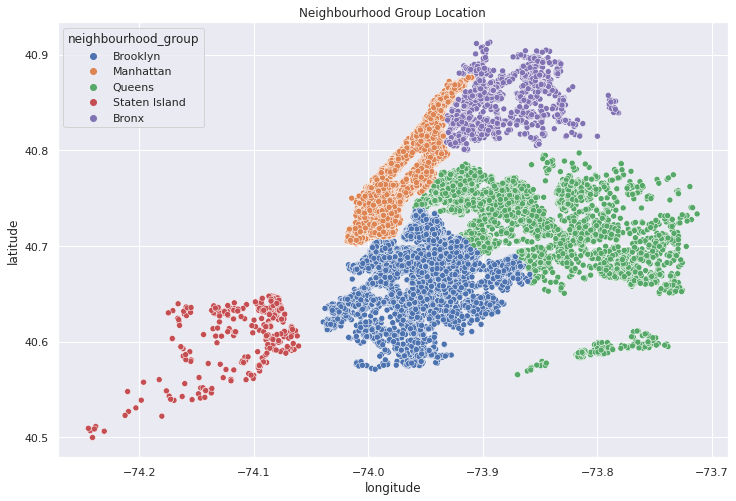

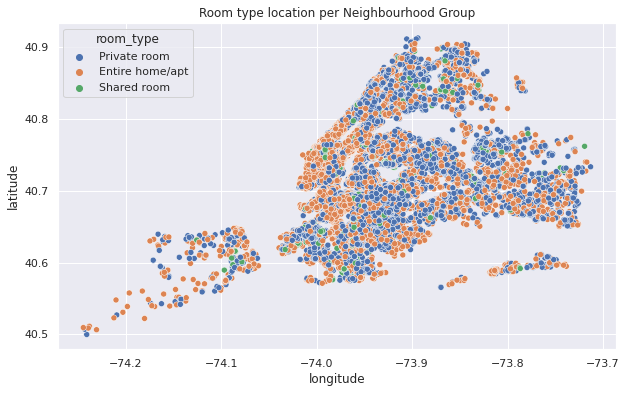

In [158]:
#  finding the neighbourhood group location and the room type with the help of the given latitude and longitude through scatter plot.
title = 'Neighbourhood Group Location'
plt.figure(figsize=(12,8))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type).set_title(title)
plt.ioff()

###I am using the scatter plot here because a scatter plot is very useful when it comes to visualizing the data by dots on the graph. It also shows the correlation between the two features.

###The first is showing the area of every neighbourhood_groups with the help of latitude and longitude, we can compare the overall area of each neighbourhood group. As the longitude and latitude increase the area of the neighbourhood group is also increasing. According to this plot Queens and Brooklyn have the largest area.

###In the second plot, the neighbourhood groups with the larger area have the majority of listings, as we can see the dense data points in that area. Most of the data points are in saffron color, which is the entire home/apartment room type. The blue data points can be seen on this plot, which is the private room type. The shared room type is in rare green color.


# Price relation to neighbourhood group in NYC.

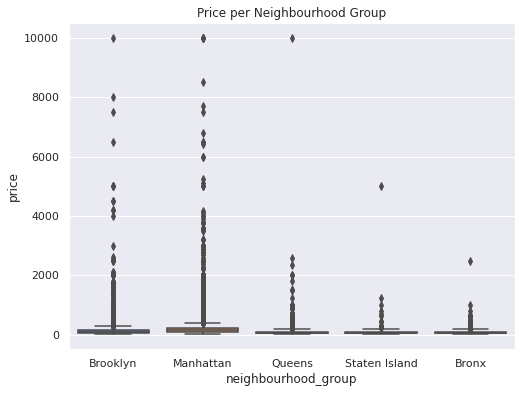

In [159]:
# Checking the price relation with the neighbourhood group in NYC through box plot.
x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()

###We are using a box plot here to see the price relationship with the neighbourhood group.

###There are some extreme values in the above observations. This shows that Brooklyn, Manhattan, and Queens have some prices nearest to 10,000 dollars, and that is very expensive. 

###In all these neighbourhood groups Manhatten has the largest number of expensive listings on air BnB, as we can see from the closely packed dots. whereas the price in State Island and Bronx have not that high.

# Checking the price relation with room type.

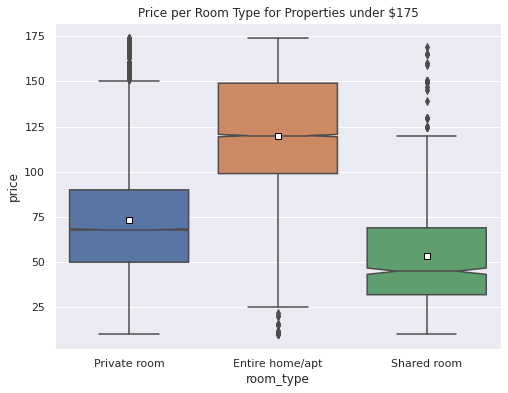

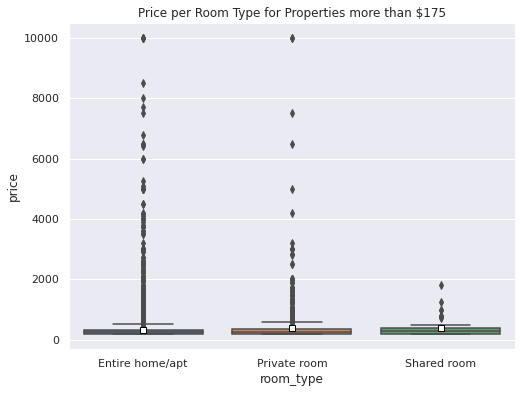

In [160]:
#  let's check the price relation with room types.
title = 'Price per Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per Room Type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

###I am using a box plot here because it shows distributions of numeric data values, especially when we want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

###As we have seen in the above boxplot that the room type which is the entire home or apartment is more costly than other room types. which is more because of its area and popularity. the shared room has the lowest price because only a few people prefer this type of room.

###Entire home or apartment is the most prominent among all room type in which most properties has the price of 150 USD 4000 USD. Whereas private room has 10 USD  to 2000 USD price for most properties. Most people prefer this price range. So we can give some offers to the customers on multiple vacations for entire apartment and private room in the popular neighbourhood like Manhatten and Brooklyn to increase the revenue.

# Price relation with the number of reviews per month.

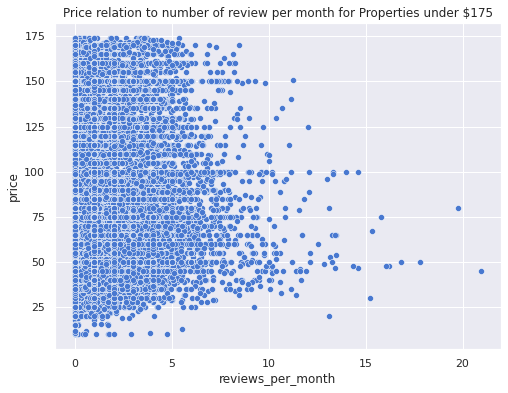

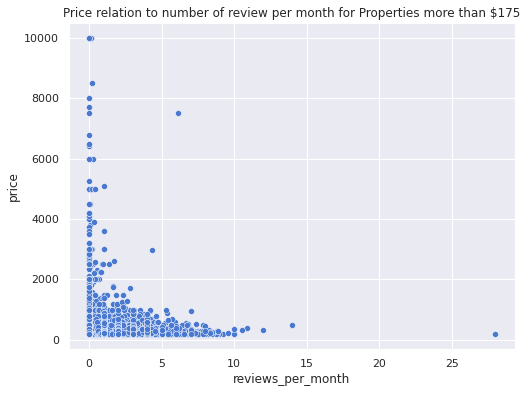

In [161]:
#  let's see the price relation with number of reviews per month.
sns.set_palette("muted")
x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number of review per month for Properties under $175'
data_filtered = data.loc[(data['price'] < 175) & (data['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()


###A scatter plot is very useful when it comes to seeing the relations between two variables. So I am using the scatter plot here because I am exploring the price relations with the number of reviews per month.

###In these two plots, the first plot shows the price related to the number of reviews per month for properties under 175 USD. The second plot shows the price related to the number of reviews per month for properties of more than 175 USD. Through this, we can say that as the price increases the number of reviews decreases.

###We can see the plot of the property with a price under 175 Usd has the most number of reviews. While more than that price we have less number of reviews. This means customers mostly like properties that have a price less than 175 USD.



## **Which host are the buisiest and why?**

In [162]:
# Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts = data.groupby(['host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).reset_index().head(10)
busiest_hosts

,index,host_name,room_type,neighbourhood_group,number_of_reviews
0,4597,Dona,Private room,Queens,629
1,8444,Jj,Private room,Manhattan,607
2,12043,Maya,Private room,Queens,543
3,2868,Carol,Private room,Manhattan,540
4,3987,Danielle,Private room,Queens,510
5,1637,Asa,Entire home/apt,Brooklyn,488
6,18270,Wanda,Private room,Brooklyn,480
7,10577,Linda,Private room,Queens,474
8,3934,Dani,Entire home/apt,Brooklyn,467
9,1179,Angela,Private room,Queens,466


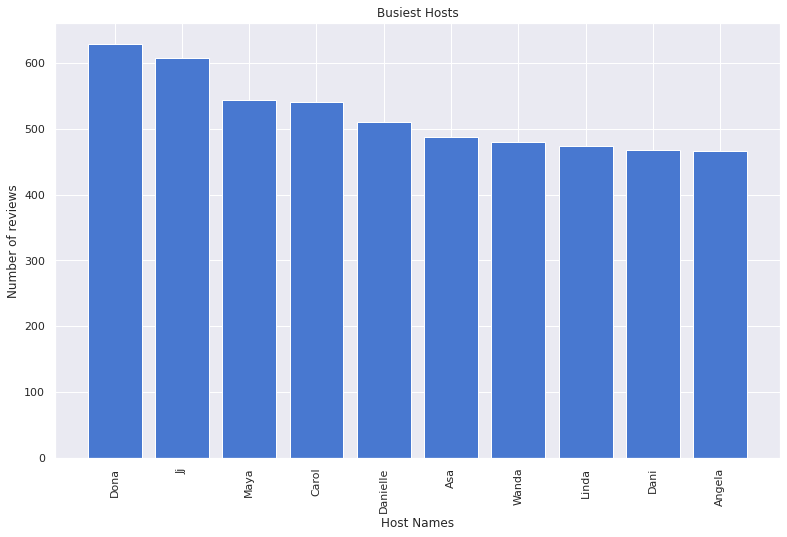

In [163]:
# Visualising the busiest hosts data through bar plot.
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts')
plt.xlabel('Host Names')
plt.ylabel('Number of reviews')
plt.bar(host_name, reviews)
plt.xticks(rotation=90)
plt.show()

###We are using the Bar Plot here to see the Busiest host based on the number of reviews.

###Through this plot, we got to know that Dona is the busiest host followed by Jj and Maya. We can also say that most of the busiest hosts are in Queens and Brooklyn.


###As we have seen here the top ten busiest host names with the number of reviews. Through this, we can say that all these hosts are getting the maximum number of reviews. The reason for this could be their listing ambiance, price, laxity, and luxoriousness.

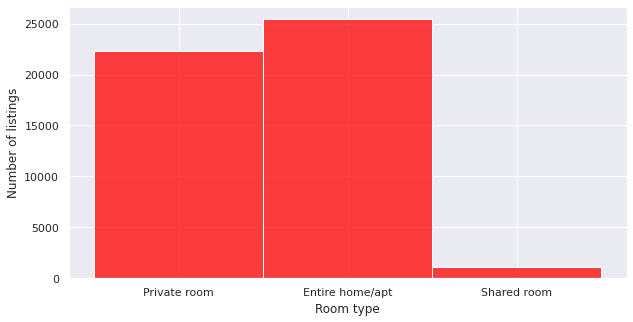

In [164]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(data['room_type'], color= 'red')
hp.set_xlabel('Room type') 
hp.set_ylabel('Number of listings')
plt.show()

###The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. Thus I am using a histogram to visualize the total number of different room types in the entire NYC.

###Through this histplot, we explored the number of different room types. We have seen that most listed properties are entire homes or apartments followed by private room types. Wherein shared rooms have the least properties listed in the entire NYC.

###Most people prefer an entire home and private room, while very few people prefer to have a shared room type.

## **Which room type is prefered in most popular neighbourhood?**

In [165]:
# Now let's find the most popular neighbourhood with preferd room type.
data.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
398,Queens,Jamaica,Private room,629
273,Manhattan,Harlem,Private room,607
369,Queens,East Elmhurst,Private room,543
288,Manhattan,Lower East Side,Private room,540
214,Brooklyn,Park Slope,Entire home/apt,488
146,Brooklyn,Bushwick,Private room,480
379,Queens,Flushing,Private room,474
230,Brooklyn,South Slope,Entire home/apt,467
399,Queens,Jamaica,Shared room,454
259,Manhattan,East Village,Private room,451


The most popular neighbourhood is Jamaica which is situated in Queens and the room type prefered here is Private Room.

## **Expensive & cheapest listings with respect to prices leading in entire NYC!**

In [166]:
# top 5 expensive listings.
data.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
9151,Furnished room in Astoria apartment,Queens,Astoria,Kathrine,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Erin,Entire home/apt,10000
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Jelena,Entire home/apt,10000
6530,Spanish Harlem Apt,Manhattan,East Harlem,Olson,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Amy,Private room,9999


Most of the expensive listings are from Manhatten.

In [167]:
# top 5 cheapest listings.
data.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:10]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
24100,"Girls only, cozy room one block from Times Square",Manhattan,Hell's Kitchen,Mario,Shared room,10
32810,Gigantic Sunny Room in Park Slope-Private Back...,Brooklyn,Sunset Park,Rachel,Entire home/apt,10
33225,Voted #1 Airbnb In NYC,Queens,Jamaica,Maria,Entire home/apt,10
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",Manhattan,Upper West Side,Salim,Private room,10
35601,"Charming, bright and brand new Bed-Stuy home",Brooklyn,Bedford-Stuyvesant,Caterina,Entire home/apt,10
2860,Large furnished 2 bedrooms- - 30 days Minimum,Manhattan,East Village,Sally,Entire home/apt,10
31407,Cozy feel at home studio,Manhattan,Kips Bay,Maureen,Private room,10
23256,"Quiet, Cozy UES Studio Near the Subway",Manhattan,Upper East Side,Amy,Entire home/apt,10
33505,Room with a view,Brooklyn,Williamsburg,Martin,Private room,10
47218,Beautiful room in Bushwick,Brooklyn,Bushwick,Julio,Private room,10


Most of the cheapest listings is in Brooklyn and Queens.

# **Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:**

In [168]:
# applying the groupby on the neighbourhood and neioghbourhood group. then getting the mean of the price per neioghbourhood.
df_n= data.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_n.loc[df_n.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


Text(0, 0.5, 'price')

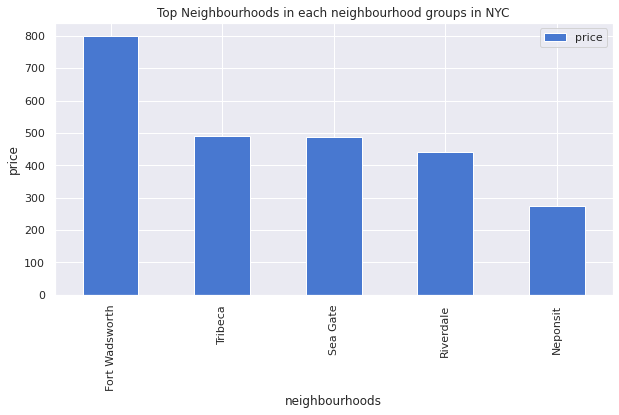

In [169]:
# let's visualize it.
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

###I have used the bar chart here to visualize the top neighbourhood in each neighbourhood group in NYC. I used this chart because a bar chart or bar graph is a chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

###Among the top neighbourhoods in each neighbourhood group, the top 2 of them namely Fort Wadsworth & Tribeca, origins from Staten Island & Manhatten. Riverdale from the Bronx, sea gate from Brooklyn, and Neponsit from Queens.

In [170]:
data.neighbourhood_group.value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [171]:
data['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

## **Key findings:-**


###1.   Manhatten has the highest number of listings (21660) followed by Brooklyn (20095) and queens (5666). Bronx (1090) and State Island (373) has the least number of listings.

###2.   The entire home apartment (25407) is the highest number of room type listing followed by Private room (22319). There is only a few shared room type (373).

###3.   Manhattan and Brooklyn make up 85% of listings available in NYC.

###4.   Manhatten and Brooklyn are the most liked neighbourhood groups by people.

###5.   Queens has significantly fewer host listings than Manhattan. So, we should take enough steps to encourage host listings in Queens.

###6.   The maximum demand is for private rooms and entire homes/apartments. People are more interested in cheaper rentals.


# **Conclusion:-**
###We can conclude from the analysis that Manhattan is the top neighbourhood group when it comes to the number of listings and highest rental prices. Given that Manhattan is world-famous for its museums, stores, parks, and theatres - and its substantial number of tourists throughout the year, hence the prices are much higher in this borough.

###The number 2 neighborhood group is Brooklyn having a significant number of listings and more affordable prices if compared to Manhattan.

###For other neighbourhood groups namely Queens, Bronx, and Staten Island there aren't as many listing options available, especially on Staten Island.

###Considering that those are residential areas, it is possible that many guests choose these locations to save up money or perhaps to visit family and friends who live in this area.
 
###For our data exploration purpose, it would have been nice to have couple of additional features like positive and negative reviews. Depending upon that we could have gauged the popularity of each neighbourhood.